Before we begin, we will change a few settings to make the notebook look a bit prettier:

In [55]:
%%html
<style> body {font-family: "Calibri", cursive, sans-serif;} </style>

<img src="../images/pokeball.png" width="100" align="right">

# Visualization of the<br> Favorite Pok&eacute;mon Survey Results
---
In this notebook, I will generate different visualizations of the [Favorite Pok&eacute;mon Survey](<https://www.reddit.com/r/pokemon/comments/c04rvq/survey_testing_the_every_pok%C3%A9mon_is_someones/>) results. The data was collected and made public by [reddit user mamamia1001](https://www.reddit.com/user/mamamia1001/). Full credit goes to him/her. I will also be including a few comments on the results and how I interpret them. For more info, take a look at the [README file](../README.md). 

Alright, let's get started.


# Preliminaries
First, let's import all the relevant packages, configure some plotting options, and define some basic (path) variables.

In [172]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pathlib

In [49]:
mpl.rcParams['font.sans-serif'] = "Calibri"
mpl.rcParams['font.family'] = "sans-serif"
sns.set(font_scale=1.75)
sns.set_style('ticks')
plt.rc('axes.spines', top=False, right=False)

In [4]:
# Define paths.
PATH_DATA = pathlib.Path(r'../data')

# Read data
I [downloaded a copy](../data) of the [original results](https://docs.google.com/spreadsheets/d/1c16Wh4AawHGbTi3Eq1DGZQdM4FMUlJO1YwXJZ_ylRvg/edit#gid=557303698) as an Excel file. Let's read just the relevant parts:

In [68]:
df = pd.read_excel(PATH_DATA/'responses.xlsx', sheet_name='Results', usecols='A:E')
df.rename(columns={'Results in full':'name', 'Unnamed: 1':'votes', 'Unnamed: 2':'types', 'Unnamed: 3':'generation', 'Unnamed: 4':'family'}, inplace=True)

# Shift the index by 1, so that it matches the Pokemon number.
df.index = df.index + 1

# Remove any potential NaN.
df.dropna(inplace=True)

df.head(3)

,name,votes,types,generation,family
1,Bulbasaur,710.0,Grass Poison,1.0,Bulbasaur
2,Ivysaur,83.0,Grass Poison,1.0,Bulbasaur
3,Venusaur,127.0,Grass Poison,1.0,Bulbasaur


# Original Analysis
As a sanity check, let's (re)compute the already reported numbers.

### Number of valid votes
Original result: 52725

From the aggregated results:

In [8]:
n_votes = df['votes'].sum()
print(n_votes)

52725.0


### Average votes per Pok&eacute;mon
Original result: 65

In [9]:
n_pokemon = len(df['name'].unique())
print(n_votes/n_pokemon)

65.17305315203956


### Average votes per Pok&eacute;mon per generation

In [51]:
df_votes_generation = df.groupby(['generation']).mean()
print(df_votes_generation)

                 votes
generation            
1.0         121.119205
2.0          91.150000
3.0          70.140741
4.0          70.383178
5.0          28.147436
6.0          29.916667
7.0          20.181818


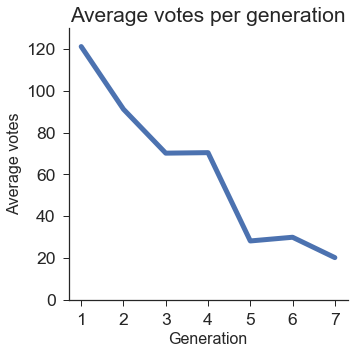

In [151]:
fig, ax = plt.subplots(1, 1, figsize=[5, 5])
ax.plot(df_votes_generation.index, df.groupby(['generation']).mean()['votes'], linewidth=5)
ax.set_xticks(df_votes_generation.index)
ax.set_ylim((0, 130))
ax.set_title("Average votes per generation")
ax.set_xlabel("Generation", fontdict = {'fontsize':16})
ax.set_ylabel("Average votes", fontdict = {'fontsize':16})
plt.show()

Generation colors were taken from [Bulbapedia](https://bulbapedia.bulbagarden.net/wiki/Generation).

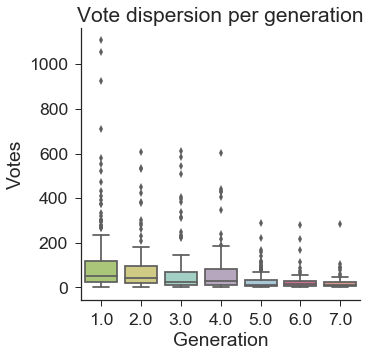

In [155]:
generation_palette = {1:'#ACD36C', 2:'#DCD677', 3:'#9CD7C8', 4:'#B7A3C3', 5:'#9FCADF', 6:'#DD608C', 7:'#E89483'}

fig, ax = plt.subplots(1, 1, figsize=[5, 5])
sns.boxplot(x='generation', y='votes', data=df, ax=ax, palette=generation_palette)
ax.set_title("Vote dispersion per generation")
ax.set_xlabel("Generation")
ax.set_ylabel("Votes")
plt.show()

The outliers show us Pok&eacute;mon with a high number of votes. As we will see in a second, it is clear that no Pok&eacute;mon from generations 5, 6, or 7 cracks the top preference spots.

### Pok&eacute;mon ranking
Sort Pok&eacute;mon from most to least popular:

In [106]:
df_sorted = df.sort_values('votes', ascending=False)

The top 10 (most popular) Pok&eacute;mon:

In [12]:
df_sorted.head(10)

,name,votes,type,generation,family
6,Charizard,1107.0,Fire Flying Dragon,1.0,Charmander
94,Gengar,1056.0,Ghost Poison,1.0,Gastly
59,Arcanine,923.0,Fire,1.0,Growlithe
1,Bulbasaur,710.0,Grass Poison,1.0,Bulbasaur
257,Blaziken,613.0,Fire Fighting,3.0,Torchic
197,Umbreon,607.0,Dark,2.0,Eevee
448,Lucario,604.0,Fighting Steel,4.0,Riolu
282,Gardevoir,585.0,Psychic Fairy,3.0,Ralts
133,Eevee,581.0,Normal,1.0,Eevee
149,Dragonite,551.0,Dragon Flying,1.0,Dratini


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


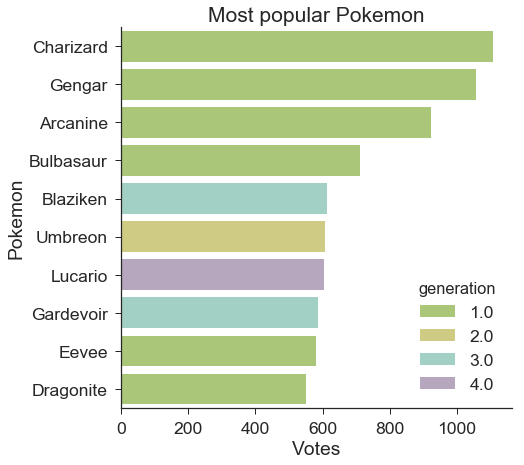

In [156]:
fig, ax = plt.subplots(1, 1, figsize=[7, 7])
sns.barplot(x=df_sorted.head(10)['votes'], y=df_sorted.head(10)['name'], hue='generation', palette=generation_palette, dodge=False, data=df_sorted.head(10), ax=ax)
ax.set_title("Most popular Pokemon")
ax.set_xlabel("Votes")
ax.set_ylabel("Pokemon")
plt.show()

Now we know who were those outliers from earlier ;) .

### Pok&eacute;mon ranking by family
The top 10 (most popular) Pok&eacute;mon *families*:

In [123]:
df_families = df[['votes', 'family']].groupby(['family']).sum().sort_values('votes', ascending=False).head(10)
df_families

,votes
family,
Eevee,2865.0
Charmander,1551.0
Gastly,1384.0
Growlithe,1199.0
Cyndaquil,1092.0
Squirtle,1066.0
Ralts,924.0
Bulbasaur,920.0
Scyther,818.0


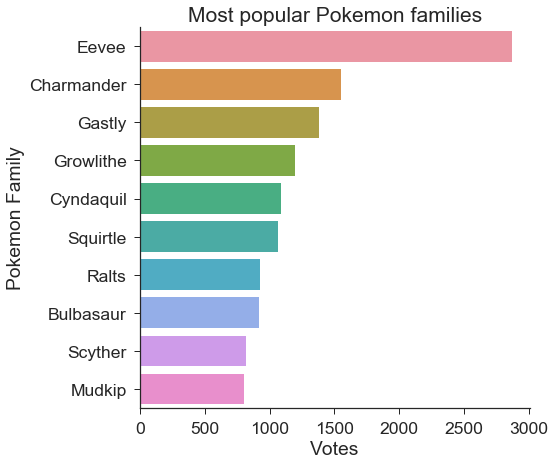

In [133]:
fig, ax = plt.subplots(1, 1, figsize=[7, 7])
sns.barplot(x=df_families['votes'], y=df_families.index, data=df_families, ax=ax)
ax.set_title("Most popular Pokemon families")
ax.set_xlabel("Votes")
ax.set_ylabel("Pokemon Family")
plt.show()

### Pok&eacute;mon ranking by generation
The most popular Pok&eacute;mon of each generation:

all


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


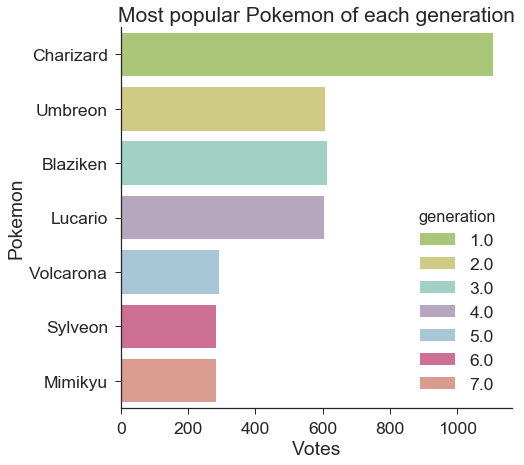

1


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


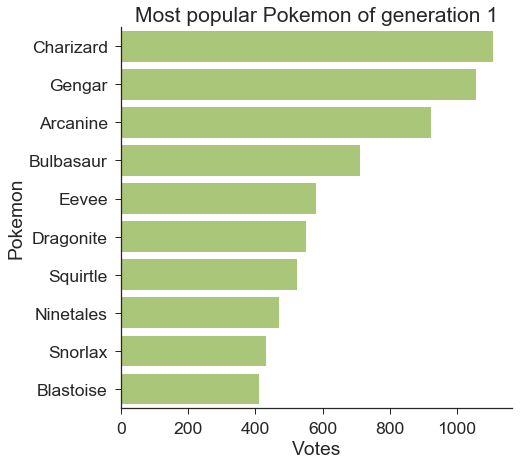

2


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


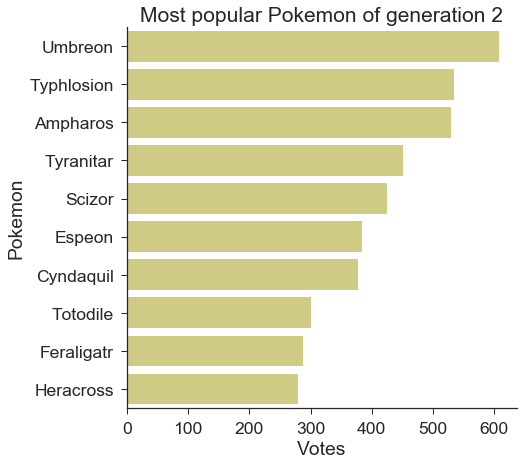

3


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


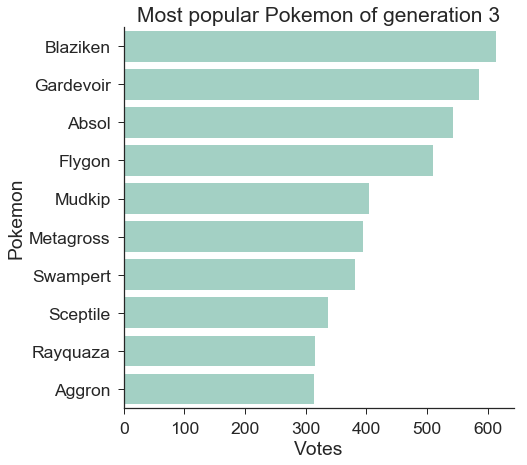

4


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


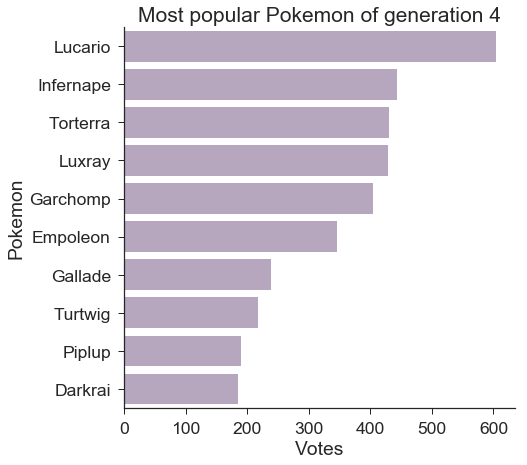

5


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


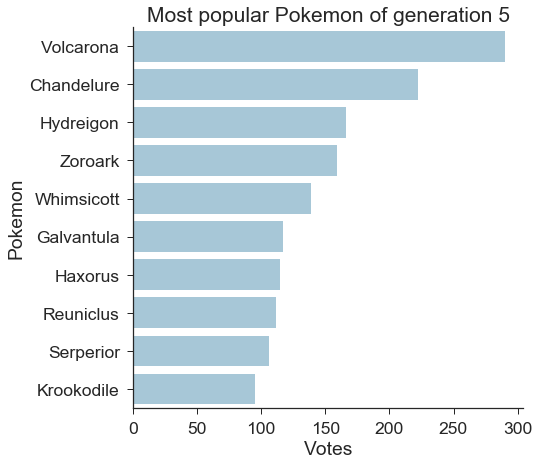

6


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


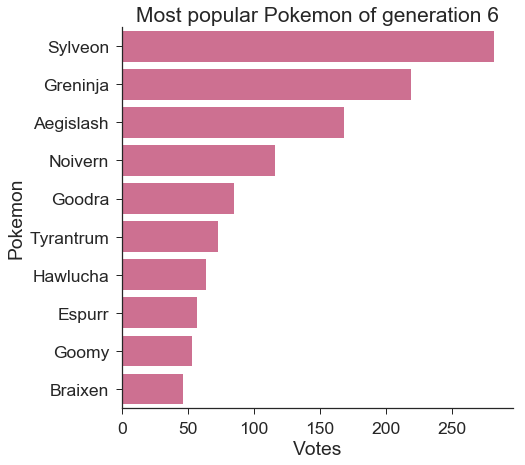

7


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


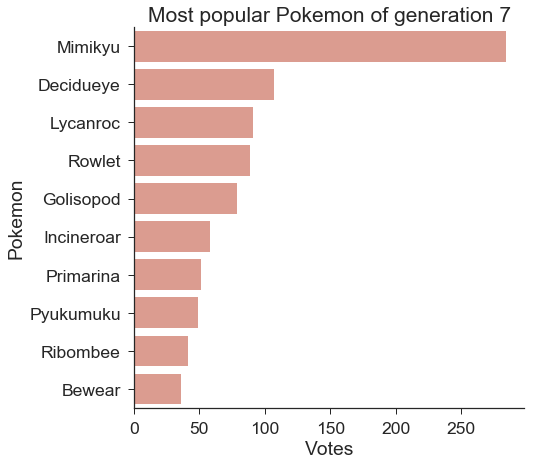

In [266]:
generations = list(df['generation'].unique().astype(int))
generations.insert(0, 'all')

for generation in generations:
    if generation == 'all':
        idx = df.groupby('generation')['votes'].transform(max) == df['votes']
        df_generation = df[idx]
        title_str = "each generation"

    else:
        df_temp = df.query('generation == "' + str(generation) + '"')
        df_generation = df_temp.sort_values('votes', ascending=False).head(10)
        title_str = "generation " + str(generation)

    print(generation)
    df_generation
    
    fig, ax = plt.subplots(1, 1, figsize=[7, 7])
    sns.barplot(x=df_generation['votes'], y=df_generation['name'], hue='generation', palette=generation_palette, dodge=False, data=df_generation, ax=ax)
    if generation != 'all':
        ax.get_legend().remove()
    ax.set_title("Most popular Pokemon of " + title_str)
    ax.set_xlabel("Votes")
    ax.set_ylabel("Pokemon")
    plt.show()


### Pok&eacute;mon ranking by type
For this, we will need to do a bit of processing. First, we will make sure that each Pok&eacute;mon has unique types (i.e., that its types are not repeated).

In [107]:
def types_unique(types):
    if type(types)==str:
        types_set = set(types.lower().split())
        return ' '.join(types_set)
    else:
        return types
df_sorted['types'] = df_sorted['types'].apply(types_unique)

After that, we will split each type into a different column:

In [108]:
n_types = 3
types_all = df_sorted['types'].str.split(" ", n=n_types, expand = True)

for ii in np.arange(0, n_types):
    column_name = 'type' + str(ii+1)
    df_sorted[column_name] = types_all[ii]


Now, we can do an analysis per type. Consider that Alolan versions might have different types for the same Pok&eacute;mon (e.g., Vulpix is fire type, while Alolan Vulpix is ice).

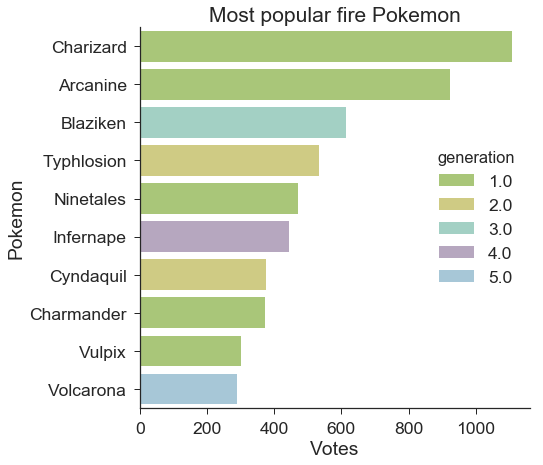

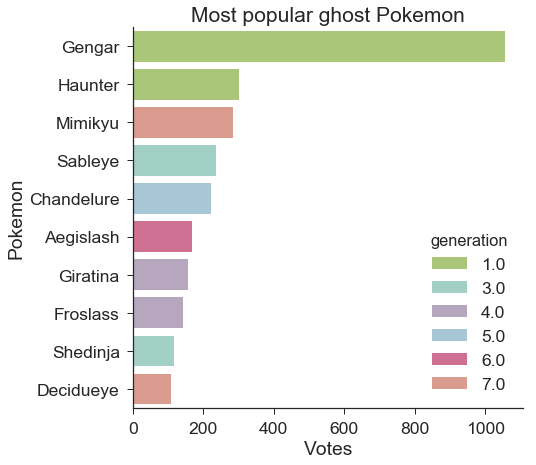

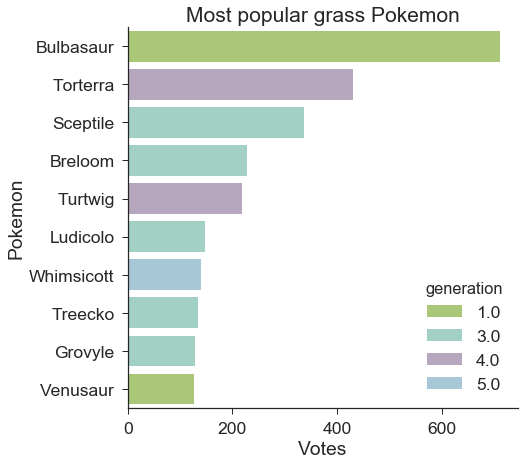

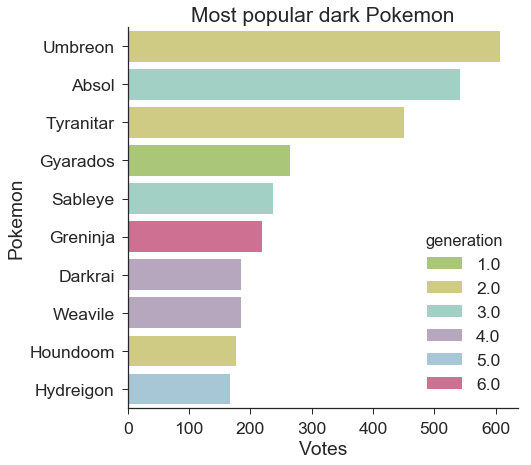

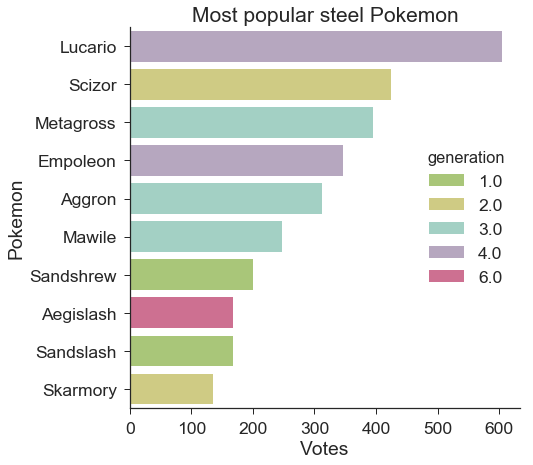

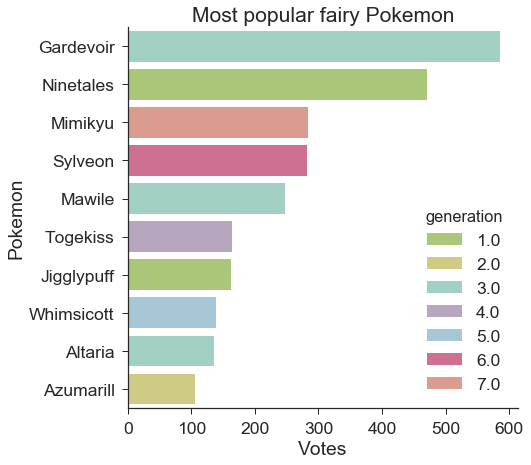

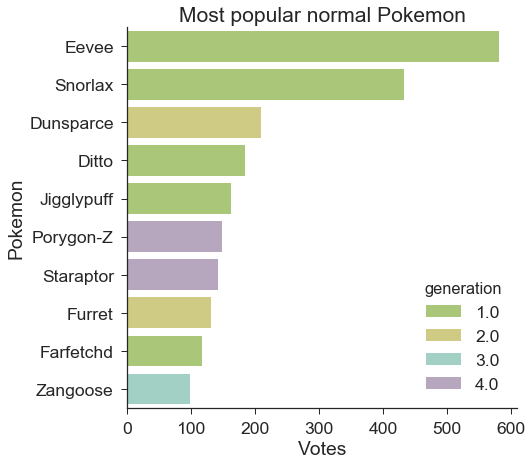

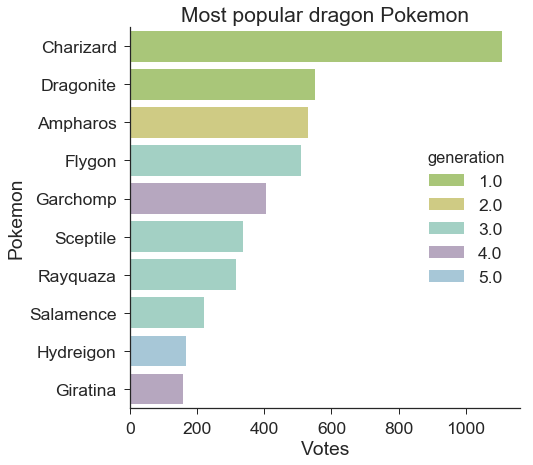

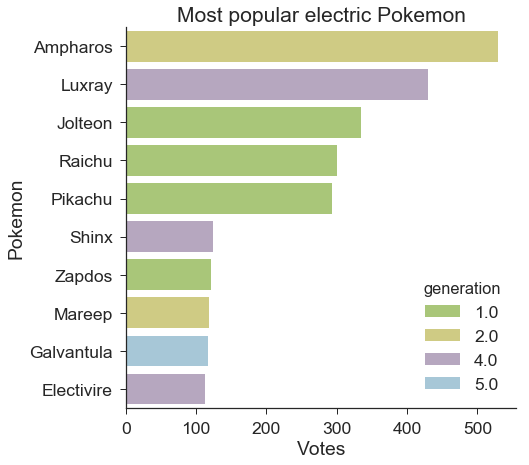

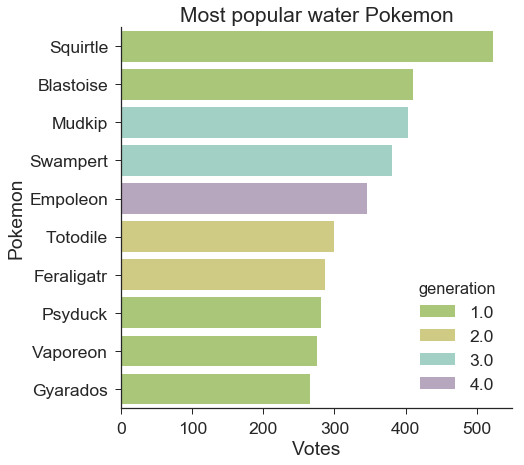

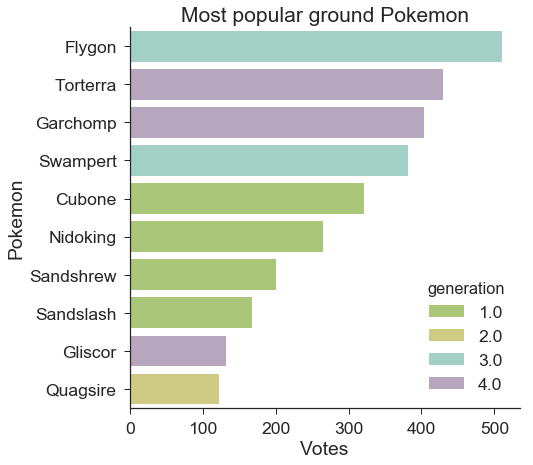

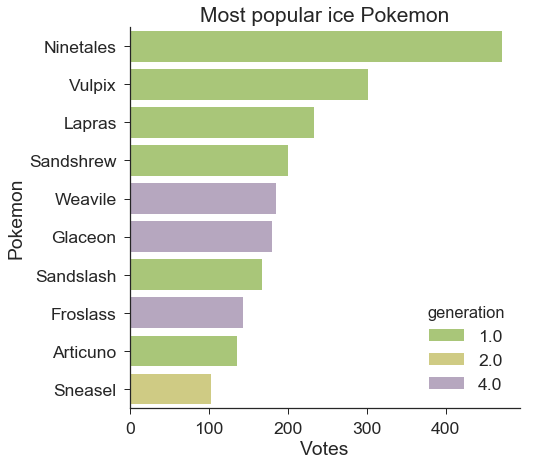

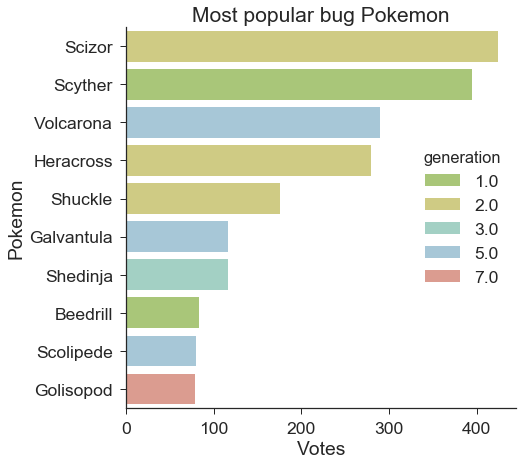

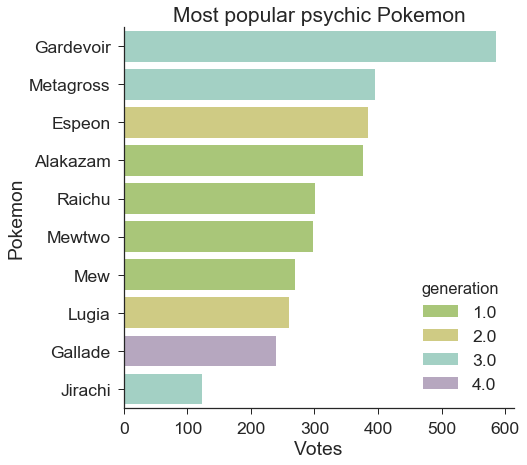

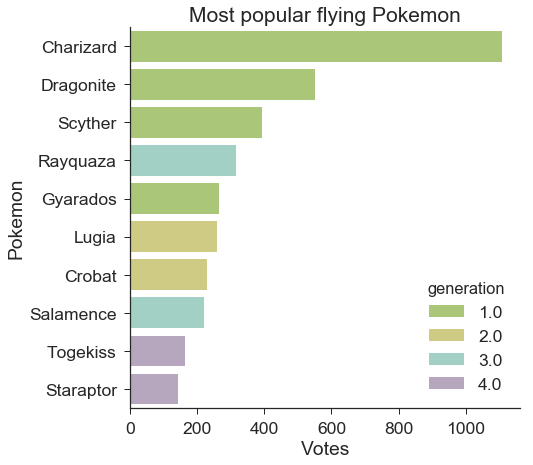

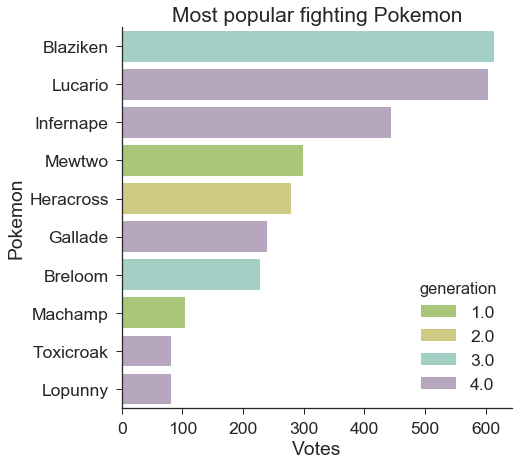

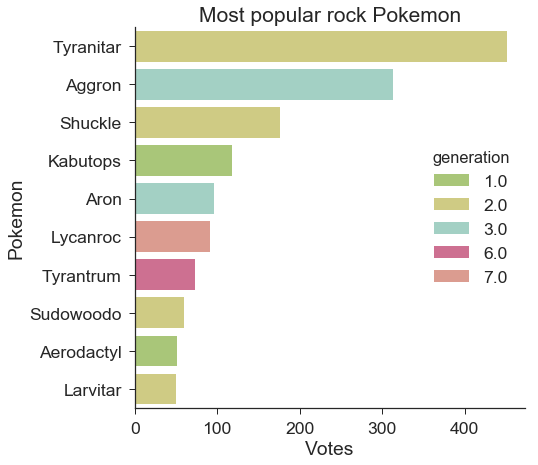

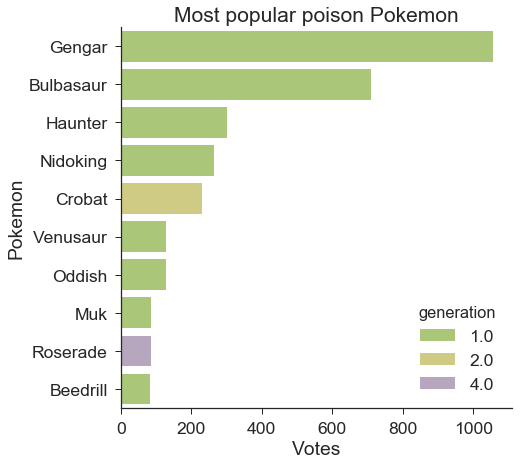

In [158]:
types = df_sorted['type1'].unique()
for pokemon_type in types:
    df_temp = df_sorted.query('type1=="' + pokemon_type + '" | type2=="' + pokemon_type + '" | type3=="' + pokemon_type + '"')
    df_temp.head(10)
    
    fig, ax = plt.subplots(1, 1, figsize=[7, 7])
    sns.barplot(x=df_temp.head(10)['votes'], y=df_temp.head(10)['name'], hue='generation', palette=generation_palette, dodge=False, data=df_temp.head(10), ax=ax)
    ax.set_title("Most popular " + pokemon_type + " Pokemon")
    ax.set_xlabel("Votes")
    ax.set_ylabel("Pokemon")
    plt.show()

### Least loved Pok&eacute;mon
The least popular Pok&eacute;mon. Those who received 0 votes:

In [14]:
df_sorted.query('votes == 0')

,name,votes,type,generation,family
574,Gothita,0.0,Psychic,5.0,Gothita
603,Eelektrik,0.0,Electric,5.0,Tynamo
266,Silcoon,0.0,Bug,3.0,Wurmple
734,Yungoos,0.0,Normal,7.0,Yungoos


...and those who received 1 vote:

In [15]:
df_sorted.query('votes == 1')

,name,votes,type,generation,family
540,Sewaddle,1.0,Bug Grass,5.0,Sewaddle
594,Alomomola,1.0,Water,5.0,Alomomola
790,Cosmoem,1.0,Psychic,7.0,Cosmog
343,Baltoy,1.0,Ground Psychic,3.0,Baltoy
451,Skorupi,1.0,Poison Bug,4.0,Skorupi
732,Trumbeak,1.0,Normal Flying,7.0,Pikipek
102,Exeggcute,1.0,Grass Psychic,1.0,Exeggcute
504,Patrat,1.0,Normal,5.0,Patrat


The bottom 10 (least popular) Pok&eacute;mon *families*:

In [16]:
df[['votes', 'family']].groupby('family').sum().sort_values('votes', ascending=False).tail(10)

# Notice that a similar result could be achieved by using
# df[['votes', 'family']].groupby('family').sum().sort_values('votes', ascending=True).head(10)

,votes
family,
Virizion,4.0
Thundurus,4.0
Uxie,3.0
Terrakion,3.0
Tapu-Bulu,2.0
Tapu-Fini,2.0
Phione,2.0
Tornadus,2.0
Landorus,2.0


### Paretto analysis
`mamamia1001` also generated a plot of the [Paretto principle](https://en.wikipedia.org/wiki/Pareto_principle) (also known as the 80/20 rule). Originally, it states that roughly 80% of the effects (in this case, votes) come from 20% of the causes (in this case, Pok&eacute;mon). Let's obtain such plot. 

First, let's compute the cumulative sum of votes and their corresponding vote percentage for each Pok&eacute;mon:

In [18]:
df_sorted['votes_cumulative'] = df_sorted['votes'].cumsum()
df_sorted['votes_cumulative_perc'] = (df_sorted['votes_cumulative']/n_votes) * 100

We just need to generate a few auxiliary variables to generate the plot:

In [19]:
df_sorted['pokemon_perc'] = (np.arange(1, n_pokemon+1)/n_pokemon)*100

# Find the index of the Pokemon corresponding to the 20% of the Pokemon.
index_pokemon_20 = abs(df_sorted['pokemon_perc'] - 20).idxmin()

# Find the index and value of the Pokemon corresponding to the 80% of the votes.
pokemon_votes_80_idx = abs(df_sorted['votes_cumulative_perc'] - 80).idxmin()
pokemon_votes_80 = df_sorted.loc[pokemon_votes_80_idx, 'pokemon_perc']

# Find the index and value of the votes corresponding to the 20% of the Pokemon
votes_pokemon_20_idx = abs(df_sorted['pokemon_perc'] - 20).idxmin()
votes_pokemon_20 = df_sorted.loc[votes_pokemon_20_idx, 'votes_cumulative_perc']

# Find the index of the votes corresponding to the 80% of the votes.
index_votes_80 = abs(df_sorted['votes_cumulative_perc'] - 80).idxmin()


Actually generate the Paretto plot:

Text(0,0.5,'Vote %')

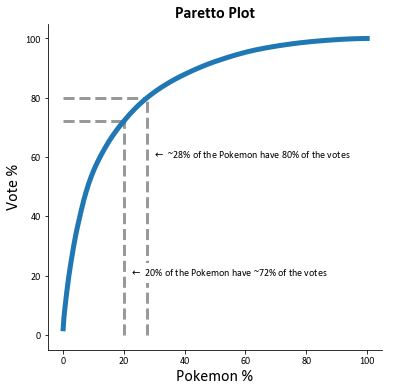

In [35]:
fig, ax = plt.subplots(1, 1, figsize=[6, 6])
ax.plot(df_sorted['pokemon_perc'], df_sorted['votes_cumulative_perc'], linewidth=5)

plt.hlines(80, 0, pokemon_votes_80, linewidth=3, linestyles='dashed', colors=[0.6, 0.6, 0.6])
plt.hlines(votes_pokemon_20, 0, df_sorted.loc[index_pokemon_20, 'pokemon_perc'], linewidth=3, linestyles='dashed', colors=[0.6, 0.6, 0.6])

plt.vlines(20, 0, df_sorted.loc[index_pokemon_20, 'votes_cumulative_perc'], linewidth=3, linestyles='dashed', colors=[0.6, 0.6, 0.6])
plt.vlines(df_sorted.loc[index_votes_80, 'pokemon_perc'], 0, df_sorted.loc[index_votes_80, 'votes_cumulative_perc'], linewidth=3, linestyles='dashed', colors=[0.6, 0.6, 0.6])

plt.text(22, 20, r"$\leftarrow$ 20% of the Pokemon have ~{0:.0f}% of the votes".format(votes_pokemon_20), backgroundcolor='w')
plt.text(pokemon_votes_80+2, 60, r"$\leftarrow$ ~{0:.0f}% of the Pokemon have 80% of the votes".format(pokemon_votes_80), backgroundcolor='w')

ax.set_title("Paretto Plot", fontdict = {'fontsize':16, 'fontweight':'bold'})
ax.set_xlabel("Pokemon %", fontdict = {'fontsize':16})
ax.set_ylabel("Vote %", fontdict = {'fontsize':16})

plt.show()

# New Analysis
Alright, time to go to uncharted territory. Fasten your Pok&eacute;seat belts.

### Votes in time
First, I would like to look at how people voted in time overall and for each of the top Pok&eacute;mon:

In [163]:
df_raw = pd.read_excel(PATH_DATA/'responses.xlsx', sheet_name='Form Responses 1')
df_raw.rename(columns={'Timestamp':'timestamp', 'What is your favourite Pokémon?':'vote'}, inplace=True)

# Remove any potential NaN.
df_raw.dropna(inplace=True)

df_raw.head(3)

,timestamp,vote
0,2019-06-13 13:02:02.242,Munchlax
1,2019-06-13 12:44:00.726,Type-Null
2,2019-06-13 12:44:45.607,Giratina


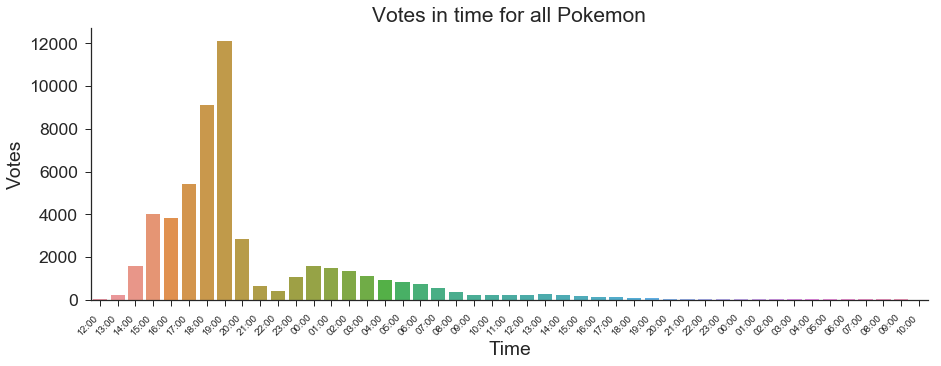

Charizard


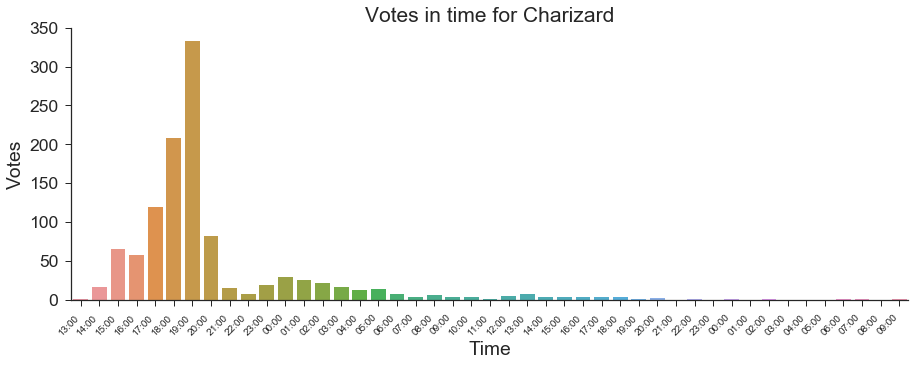

Gengar


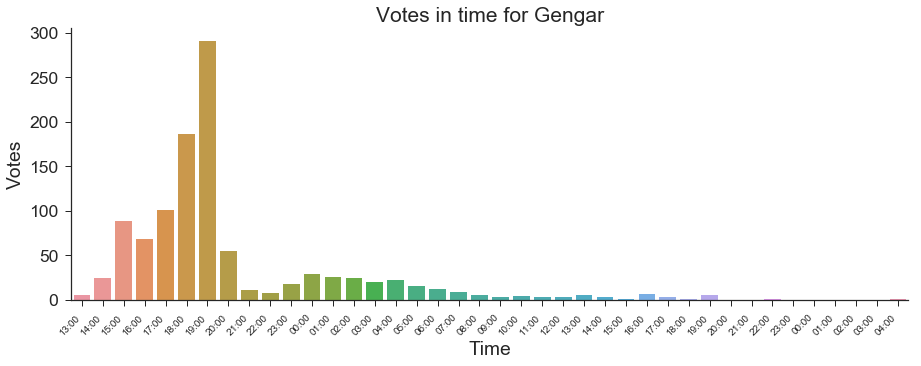

Arcanine


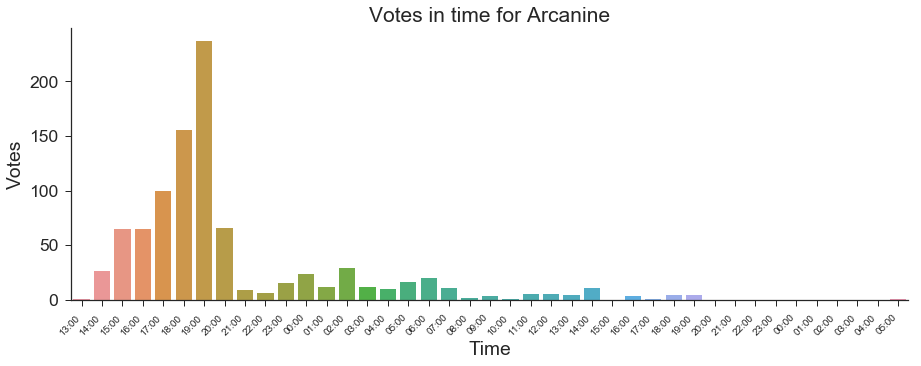

Bulbasaur


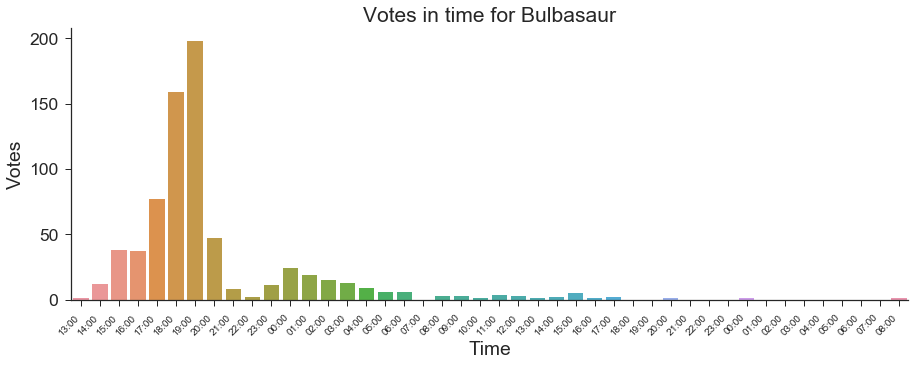

Blaziken


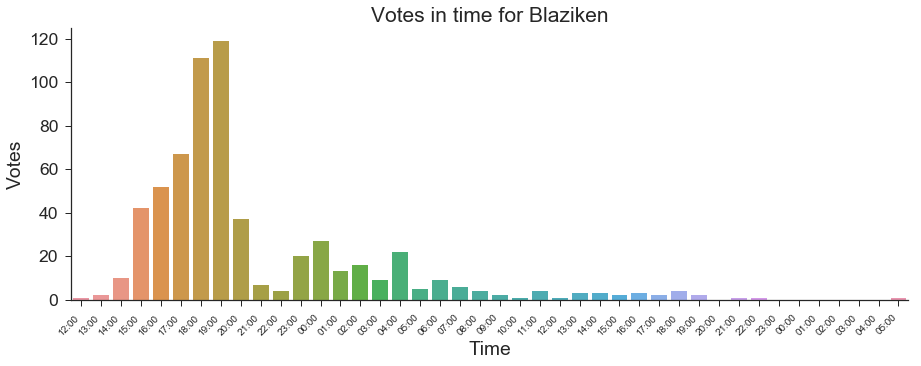

Umbreon


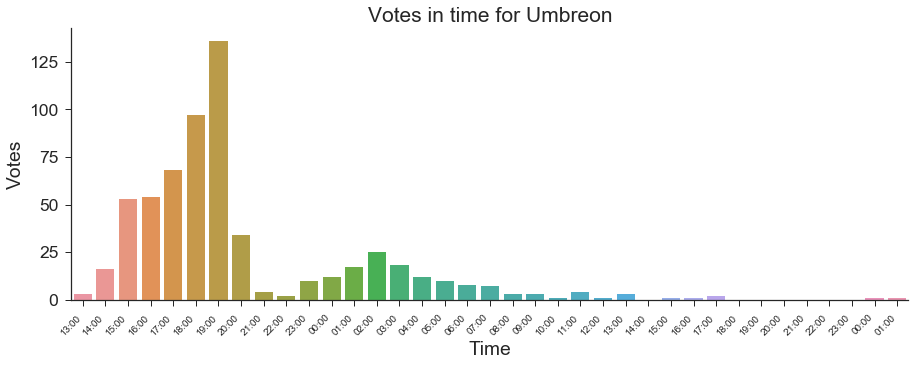

Lucario


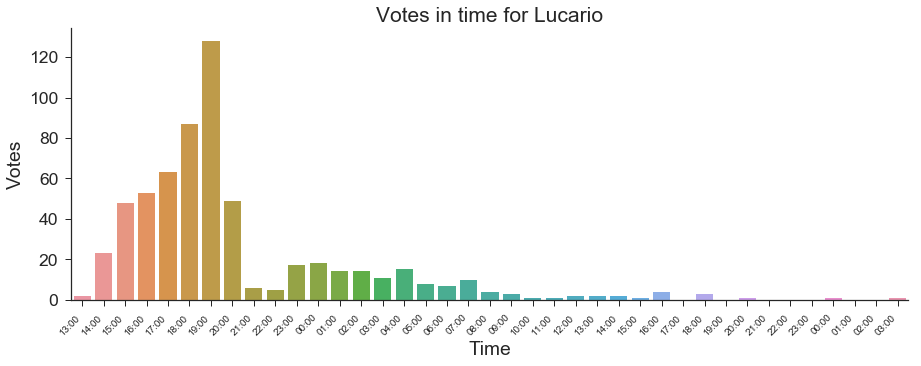

Gardevoir


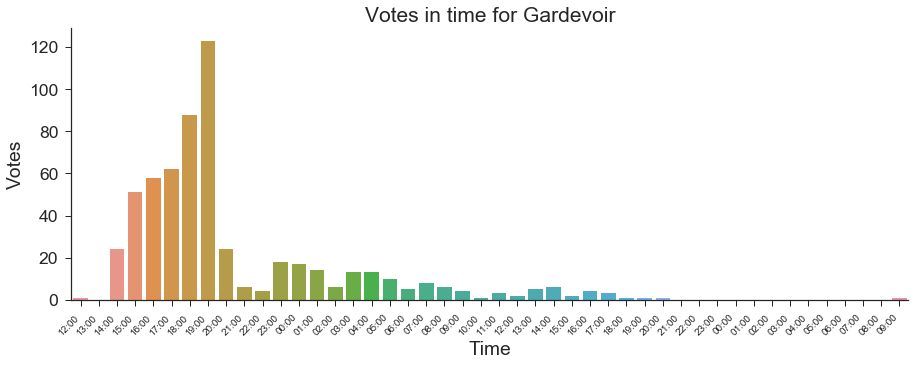

Eevee


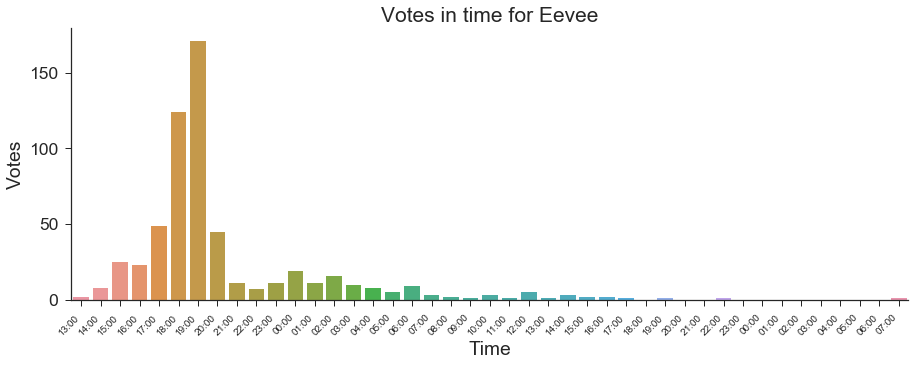

Dragonite


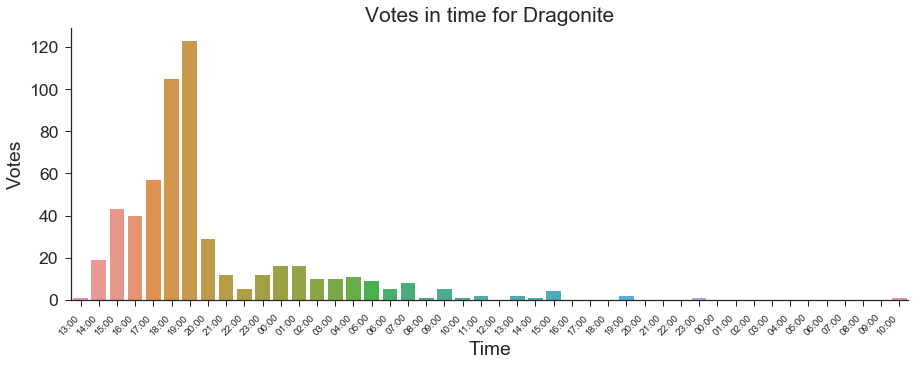

In [253]:
pokemon_time = list(df_sorted.head(10)['name'])
pokemon_time.insert(0, 'all')

for pokemon in pokemon_time:
    if pokemon == 'all':
        df_temp = df_raw.copy(deep=True)
        title_str = "all Pokemon"
    else:
        df_temp = df_raw.query('vote=="' + pokemon + '"')
        title_str = pokemon
        
    df_time = df_temp.groupby(pd.Grouper(key='timestamp', freq='1h')).count()
    df_time['timestamp'] = df_time.index

    x_times = df_time['timestamp'].dt.strftime('%H:%M')

    fig, ax = plt.subplots(1, 1, figsize=[15, 5])
    sns.barplot(x='timestamp', y='vote', data=df_time, ax=ax)
    ax.set_title("Votes in time for " + title_str)
    ax.set_xticklabels(labels=x_times, rotation=45, ha='right', fontdict = {'fontsize':10})
    ax.set_xlabel("Time")
    ax.set_ylabel("Votes")
    plt.show()

It looks like votes for each of the top Pok&eacute;mon were more or less cast in the same way than for all other Pok&eacute;mon.

In [66]:
# Colors match those used in Bulbapedia.
type_palette = {'normal':'#A8A878',
              'fire':'#F08030',
              'fighting':'#C03028',
              'water':'#6890F0',
              'flying':'#A890F0',
              'grass':'#78C850',
              'poison':'#A040A0',
              'electric':'#F8D030',
              'ground':'#E0C068',
              'psychic':'#F85888',
              'rock':'#B8A038',
              'ice':'#98D8D8',
              'bug':'#A8B820',
              'dragon':'#7038F8',
              'ghost':'#705898',
              'dark':'#705848',
              'steel':'#B8B8D0',
              'fairy':'#EE99AC'}
types = list(type_palette)

# Conclusions
There are a few interesting conclusions worth pointing out:
* There were [more votes for Pok&eacute;mon from earlier generations](#Average-votes-per-Pok&eacute;mon-per-generation). This is a very interesting result. Does nostalgia play an important role here? It is hard to say. It would be very interesting to have more information on the voters' profile (e.g., age). For instance, older fans could have more preference for Pok&eacute;mon with which they grew up with. Unfortunately, we don't have those data.
* It is no surprise that the Eevee family is [the most popular Pok&eacute;mon family](#Pok&eacute;mon-ranking-by-family), given that [Eevee is the Pokemon with the most evolutions](https://bulbapedia.bulbagarden.net/wiki/Eeveelution) (plus, let's face it, most of them are quite cool).
* The [Paretto principle](#Paretto-analysis) kinda works in this case: 20% of the Pok&eacute;mon received ~72% of the votes.
* Working with Pok&eacute;mon data is fun :)